In [2]:
from mnist import MNIST
import numpy as np
import matplotlib.pyplot as plt
def load_dataset():
    mndata = MNIST("../python-mnist/data/")
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    return X_train, labels_train, X_test, labels_test

In [3]:
X_train, labels_train, X_test, _ = load_dataset()

In [4]:
import sys
import copy


def initiate_data_l(k, d):
    data_l = []
    for i in range(k):
        data_l.append(np.zeros(d))
    return data_l
# new_data_l = np.zeros( (k, d)) # initialized data list, needs to be checked

def k_means( X_train,k=10):
    n, d = X_train.shape
#     np.random.seed(3)
    centers_idx = np.random.randint(k, size = k)
    centers = X_train[centers_idx]
#     old_data_l = X_train.copy()
    total_dist_l = []
    ct = 0
    while True: # TODO: converge condition
        squared_norm_dist = (X_train - centers[:, np.newaxis])**2

        # new centroids for each data
        centroids = np.argmin((squared_norm_dist).sum(axis=2), axis = 0)
        # total squared norm distance of all points
        total_dist = np.sum(np.min((squared_norm_dist).sum(axis=2), axis = 0))
        total_dist_l.append(total_dist)
        # new centers
        for i in range(k):
#             print("i: ", i)
#             print(X_train[centroids==i])
            data_points_in_cluster =X_train[centroids==i]
            if len(data_points_in_cluster) != 0:
                centers[i] = np.mean( data_points_in_cluster, axis = 0 )

        if len(total_dist_l) > 2:
            d = abs(total_dist_l[-1] - total_dist_l[-2])
            print("d: ", d)
            if d < 100:
                break
    return total_dist_l, centers

In [ ]:
total_dist_l_10, centers_10 = k_means(X_train, k=10)

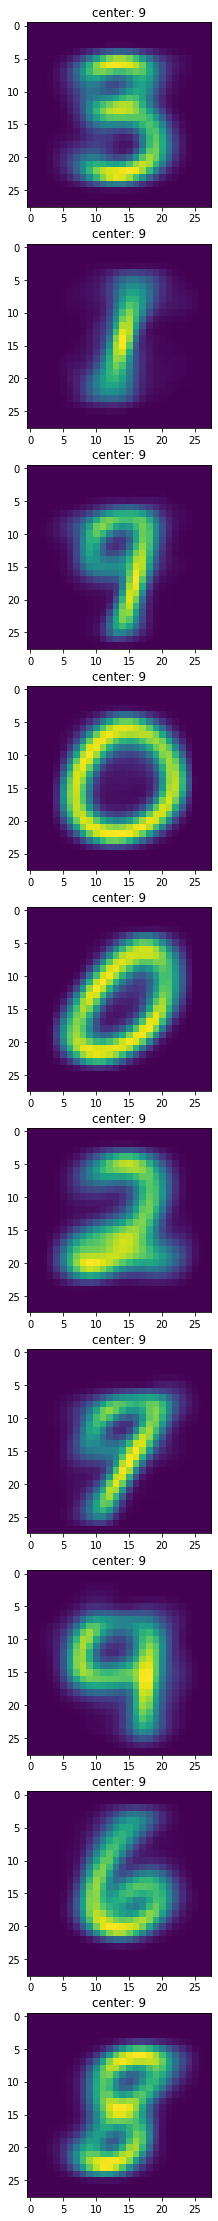

In [103]:


fig, axes = plt.subplots(10)


fig.set_figheight(40)
fig.set_figwidth(40)
# num_pic = len(pics)
# num_recons = len(ks) # types of reconstruction
for j in range(len(centers)):
    c = centers_10[j]
    axes[j].imshow(c.reshape(28, 28))
    title_text  = "center: " + str(i) 
    axes[j].title.set_text(title_text)
#     axes[j].title.
        
plt.savefig("A4b1")
plt.show()

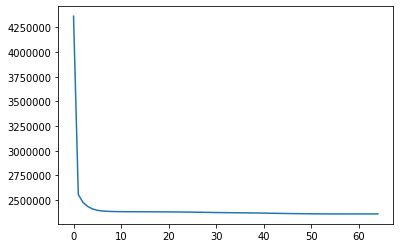

In [107]:
from matplotlib import pyplot as plt

plt.plot(list(range(len(total_dist_l_10))), total_dist_l_10)
plt.savefig("A4b2")

In [5]:
def computeError(data, centroids):
    res = 0
    for pt in data:
        errors = []
        for c in centroids:
            diff = pt - c
            errors.append(np.dot(diff, diff))
        res += min(errors)
    return res / len(data)

k = 2
d:  16155.08230276918
d:  4518.22008497268
d:  2509.0848493417725
d:  1893.4791629174724
d:  1563.9830404585227
d:  1351.3549953177571
d:  1050.5364697156474
d:  806.0981714441441
d:  631.7875073840842
d:  376.35471065109596
d:  218.16354658221826
d:  107.54508405411616
d:  58.28512331470847
k = 4
d:  44637.4557673526
d:  47823.03281354485
d:  28658.16551526077
d:  16673.687025610823
d:  16665.713187921327
d:  16620.996502098627
d:  10457.087854045443
d:  4555.532843531109
d:  1717.941138504073
d:  669.2574906116351
d:  331.3847568118945
d:  188.05284365499392
d:  101.06952169677243
d:  56.09098415123299
k = 8
d:  69311.62370777177
d:  41598.61269103037
d:  34338.34323066007
d:  26857.100286992267
d:  25311.967111075763
d:  15867.901921136305
d:  8359.326539343223
d:  5119.95957737742
d:  3265.5600730297156
d:  2278.5914135575294
d:  1903.5985426590778
d:  2019.802470203489
d:  2537.993499661796
d:  3033.188064184971
d:  3291.473122065421
d:  4109.2112577748485
d:  3817.873029673

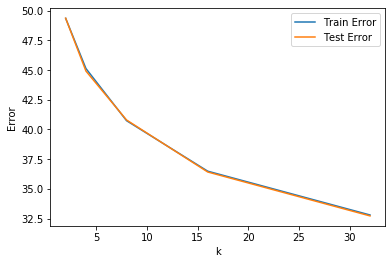

In [6]:
# calculate errors for k values
ks = [2, 4, 8, 16, 32]
train_errors = []
test_errors = []
for k in ks:
    print("k =" , k)
    _, centers = k_means(X_train, k)
    train_errors.append(computeError(X_train, centers))
    test_errors.append(computeError(X_test, centers))
# plot train/test error
plt.plot(ks, train_errors, label="Train Error")
plt.plot(ks, test_errors, label="Test Error")
plt.legend()
plt.xlabel("k")
plt.ylabel("Error")
plt.savefig("A4c")
plt.show()
